# First Deep Learning Project in Python with Keras Step-By-Step

#### Source:

This practical is based on the blog post:

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Here we are going to reproduce parts of that post.
I recommend using Anaconda Python, read the installation guide for it under Unit 7. Use Python 3.x.



### Prerequisites:
Libraries used in this tutorial:
- keras (now built into TensorFlow)
- numpy
- sklearn
- pydot

External libraries (necessary for visualization):
- https://graphviz.gitlab.io/download/

If you set up your machine at home you can remove the cell below

In [1]:
!pip install pydot
!pip install graphviz
!pip install tensorflow

#### Datasets used
Please download the following datasets and put them into the folder, where this notebook is located (i.e. your working directory):
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
- http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data

### Install Tensorflow:

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# For plotting layers
from keras.utils.vis_utils import plot_model
import pydot
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load the Pima Indian dataset

It is a csv file with ',' as delimiter.

In [4]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=',')
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

The variables can be summarized as follows:

Input Variables (X):

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

Output Variables (Y):

1. Class variable (0 or 1)

# Task 0
What is the size of this dataset? Take a look at a few rows of this dataset to make sure you understand the structure of the data.

In [5]:
# Separate the dataset into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

### SOLUTION TO TASK 0

In [6]:
print("size of data:", dataset.size)

size of data: 6912


In [7]:
print("shape of data:", dataset.shape)

shape of data: (768, 9)


- The model expects rows of data with 8 variables (the input_dim=8 argument)
- The first hidden layer has 12 nodes and uses the relu activation function.
- The second hidden layer has 8 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.

In [8]:
# define the Keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
#Check your model 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


To train a neural network model you will need to specify a loss function, an optimizer, and some metrics for monitoring.

https://www.tensorflow.org/guide/keras/train_and_evaluate/

In [10]:
# compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# fit the Keras model on the dataset
history = model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 0s 274us/step - loss: 10.2109 - accuracy: 0.5599
Epoch 2/150
768/768 [==============================] - 0s 108us/step - loss: 2.4197 - accuracy: 0.5339
Epoch 3/150
768/768 [==============================] - 0s 135us/step - loss: 1.7575 - accuracy: 0.5612
Epoch 4/150
768/768 [==============================] - 0s 148us/step - loss: 1.4775 - accuracy: 0.5794
Epoch 5/150
768/768 [==============================] - 0s 148us/step - loss: 1.2011 - accuracy: 0.5859
Epoch 6/150
768/768 [==============================] - 0s 132us/step - loss: 1.0914 - accuracy: 0.6003
Epoch 7/150
768/768 [==============================] - 0s 116us/step - loss: 1.0958 - accuracy: 0.5807
Epoch 8/150
768/768 [==============================] - 0s 112us/step - loss: 0.9229 - accuracy: 0.6172
Epoch 9/150
768/768 [==============================] - 0s 124us/step - loss: 0.9856 - accuracy: 0.5872
Epoch 10/150
768/768 [==============================] - 0s 192us/step - 

In [12]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

768/768 [==============================] - 0s 70us/step
Accuracy: 76.56


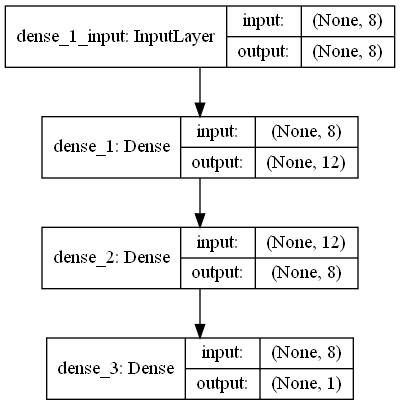

In [13]:
# Plot model
plot_model(model, show_shapes=True, show_layer_names=True)

Text(0, 0.5, 'Cross entropy loss')

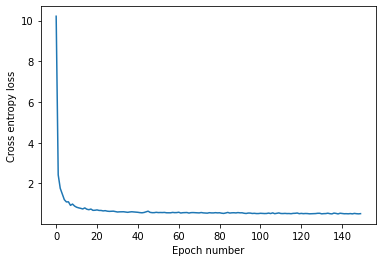

In [14]:
#Plot history
plt.plot(history.history['loss'], label='binary cross entropy loss')
plt.xlabel('Epoch number')
plt.ylabel('Cross entropy loss')

## Predictions

In [15]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions 
rounded = [round(x[0]) for x in predictions]


# Task 1
Create another model (give it a different name) with a slightly different architecture, e.g. with a different number of neurons in the two hidden layers. Specify how many neurons in each layer. Add an extra hidden layer.

In [16]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
model_task = Sequential()
model_task.add(Dense(15, input_dim=8, activation='relu'))
model_task.add(Dense(10, activation='relu'))
model_task.add(Dense(5, activation='sigmoid'))
model_task.add(Dense(1, activation='sigmoid'))

In [17]:
#checking our new model 
model_task.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 356
Trainable params: 356
Non-trainable params: 0
_________________________________________________________________


Let the new model be called model_task, while changing the architecture from dense from 12, 8, 1 and 1 to 15, 10, 5, and 1. In addition, I also ensured i added thw two hidden layers.

# Task 2

Split the data into a training set (80%) and a validation set (20%), by setting the *validation_split* parameter appropriately in the Keras model. 


In [18]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
model_task.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
new_history = model_task.fit(X, Y, validation_split = 0.2, epochs=150, batch_size=10)

Train on 614 samples, validate on 154 samples
Epoch 1/150
614/614 [==============================] - 0s 552us/step - loss: 0.7595 - accuracy: 0.4104 - val_loss: 0.6891 - val_accuracy: 0.5195
Epoch 2/150
614/614 [==============================] - 0s 166us/step - loss: 0.6670 - accuracy: 0.6124 - val_loss: 0.6571 - val_accuracy: 0.6623
Epoch 3/150
614/614 [==============================] - 0s 162us/step - loss: 0.6494 - accuracy: 0.6498 - val_loss: 0.6526 - val_accuracy: 0.6688
Epoch 4/150
614/614 [==============================] - 0s 182us/step - loss: 0.6377 - accuracy: 0.6515 - val_loss: 0.6621 - val_accuracy: 0.5779
Epoch 5/150
614/614 [==============================] - 0s 238us/step - loss: 0.6294 - accuracy: 0.6531 - val_loss: 0.6526 - val_accuracy: 0.6169
Epoch 6/150
614/614 [==============================] - 0s 202us/step - loss: 0.6173 - accuracy: 0.6612 - val_loss: 0.6662 - val_accuracy: 0.5649
Epoch 7/150
614/614 [==============================] - 0s 246us/step - loss: 0.6168 

# Task 3 

Visualize the performance of your model during training by using the history dictionary object (part of model.fit()). Plot training loss and validation loss against Epoch.

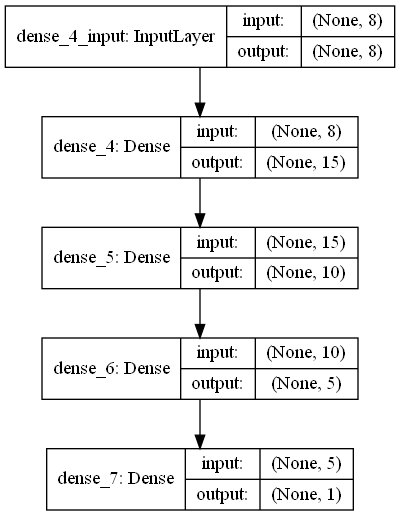

In [20]:
plot_model(model_task, show_shapes=True, show_layer_names=True)

In [21]:
print(new_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


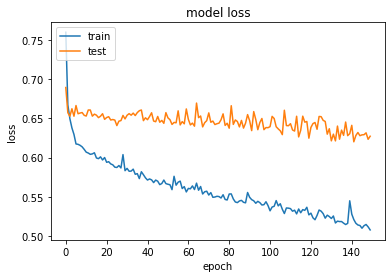

In [22]:
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Task 4

Using your model from *Task 1* change the activation functions and see how this affects training.

Kindly note that in order to change the activation functions used in task one, we would be assigning a new variable to this alterartion, which is model_task2, new_history2 

In [23]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
#Please post your solution here.
#Feel free to add markdown and code cells as you need
model_task2 = Sequential()
model_task2.add(Dense(40, input_dim=8, activation='relu'))
model_task2.add(Dense(25, activation='relu'))
model_task2.add(Dense(15, activation='sigmoid'))
model_task2.add(Dense(1, activation='sigmoid'))

In [24]:
model_task2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                360       
_________________________________________________________________
dense_9 (Dense)              (None, 25)                1025      
_________________________________________________________________
dense_10 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 1,791
Trainable params: 1,791
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_task2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
new_history2 = model_task2.fit(X, Y, validation_split = 0.2, epochs=150, batch_size=10)

Train on 614 samples, validate on 154 samples
Epoch 1/150
614/614 [==============================] - 0s 523us/step - loss: 0.6595 - accuracy: 0.6531 - val_loss: 0.6492 - val_accuracy: 0.6429
Epoch 2/150
614/614 [==============================] - 0s 290us/step - loss: 0.6214 - accuracy: 0.6531 - val_loss: 0.6473 - val_accuracy: 0.6429
Epoch 3/150
614/614 [==============================] - 0s 187us/step - loss: 0.6117 - accuracy: 0.6531 - val_loss: 0.6399 - val_accuracy: 0.6429
Epoch 4/150
614/614 [==============================] - 0s 191us/step - loss: 0.6040 - accuracy: 0.6531 - val_loss: 0.6445 - val_accuracy: 0.6429
Epoch 5/150
614/614 [==============================] - 0s 172us/step - loss: 0.5966 - accuracy: 0.6531 - val_loss: 0.6430 - val_accuracy: 0.6429
Epoch 6/150
614/614 [==============================] - 0s 191us/step - loss: 0.5919 - accuracy: 0.6531 - val_loss: 0.6450 - val_accuracy: 0.6429
Epoch 7/150
614/614 [==============================] - 0s 195us/step - loss: 0.5905 

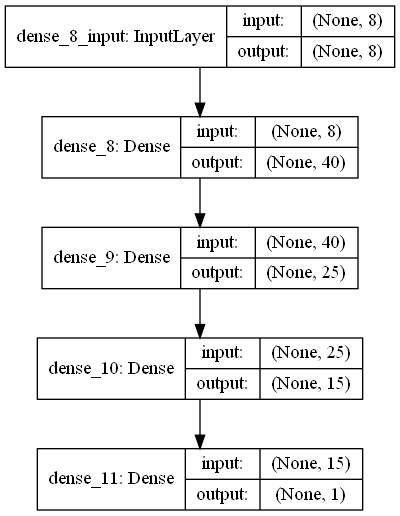

In [27]:
plot_model(model_task2, show_shapes=True, show_layer_names=True)

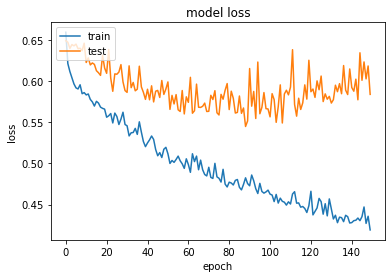

In [28]:
plt.plot(new_history2.history['loss'])
plt.plot(new_history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Task 5

Increase the number of epochs. See what happens.

In [29]:
model_task.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
new_history3 = model_task.fit(X, Y, validation_split = 0.2, epochs=300, batch_size=10)

Train on 614 samples, validate on 154 samples
Epoch 1/300
614/614 [==============================] - 0s 592us/step - loss: 0.5131 - accuracy: 0.7231 - val_loss: 0.6178 - val_accuracy: 0.6429
Epoch 2/300
614/614 [==============================] - 0s 157us/step - loss: 0.5061 - accuracy: 0.7248 - val_loss: 0.6453 - val_accuracy: 0.6039
Epoch 3/300
614/614 [==============================] - 0s 162us/step - loss: 0.5100 - accuracy: 0.7410 - val_loss: 0.6355 - val_accuracy: 0.6558
Epoch 4/300
614/614 [==============================] - 0s 142us/step - loss: 0.5066 - accuracy: 0.7459 - val_loss: 0.6184 - val_accuracy: 0.6558
Epoch 5/300
614/614 [==============================] - 0s 157us/step - loss: 0.5156 - accuracy: 0.7378 - val_loss: 0.6337 - val_accuracy: 0.6429
Epoch 6/300
614/614 [==============================] - 0s 162us/step - loss: 0.5090 - accuracy: 0.7231 - val_loss: 0.6336 - val_accuracy: 0.6299
Epoch 7/300
614/614 [==============================] - 0s 169us/step - loss: 0.5107 

*Increasing the number of epoch from 150 to 300, which is twice the initial value of the first history, we can see that their is an increament in the value of accuracy and val_loss, while their is a decrease in loss*

# Task 6 (optional)

Try similar steps for the multiclass tutorial:

https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [31]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [32]:
# loading the dataset
dataframe = pandas.read_csv("iris.data", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

In [33]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [34]:
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [35]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.67% (5.37%)
